# Zeri di funzione

Si vuole trovare lo zero di $y=x^4-3x^3+x^2-1$

In [1]:
def y(x):
    return x**4 - 3*x**3 + x**2 - 1

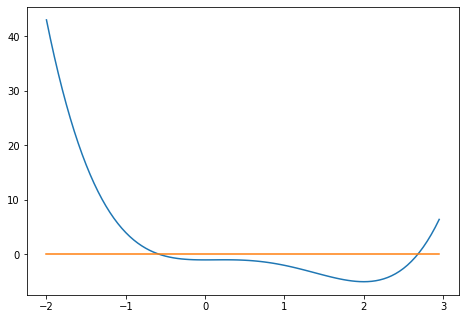

In [2]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
x = np.arange(-2.0, 3.0, 0.05).ravel()
y_vals = np.vectorize(y)(x)
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot(x,y_vals)
ax.plot(x,np.zeros(len(x)))

Notiamo che è presente uno zero fra 2 e 3:

In [3]:
RANGE = [1,3]
TOL = 2 * np.spacing((float(RANGE[0]) + float(RANGE[1]))/2)

## Metodo di bisezione

In [4]:
%time
def bisection(func, start, stop, tol):
    middle = 0.0
    while func(start) * func(stop) < 0:
        middle = (start + stop) / 2
        if func(middle) * func(start) > 0:
            start = middle
        else:
            stop = middle
        if abs(stop - start) <= TOL:
            break
    return middle

bisection_result = bisection(y, RANGE[0], RANGE[1], TOL)
(bisection_result, y(bisection_result))

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 44.6 µs


(2.6787124756874983, -1.7763568394002505e-15)

## Metodo di falsa posizione

In [5]:
%time
def regula_falsi(f, start, stop, tol):
    old_x = stop
    x = start
    while abs(x-old_x) / abs(x) > tol:
        old_x = x
        x = start - f(start) * (stop - start) / (f(stop) - f(start))
        if f(x) * f(start) < 0:
            stop = x
        else:
            start = x
    return x

rf_result = regula_falsi(y, RANGE[0], RANGE[1], TOL)
(rf_result, y(rf_result))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 9.06 µs


(2.678712475687498, -1.1546319456101628e-14)

## Metodo delle corde
Abbiamo bisogno della derivata prima $y'(x)$ di $y = f(x)$.

$y'(x)$ = 4 x^3 - 9x^2 + 2x $

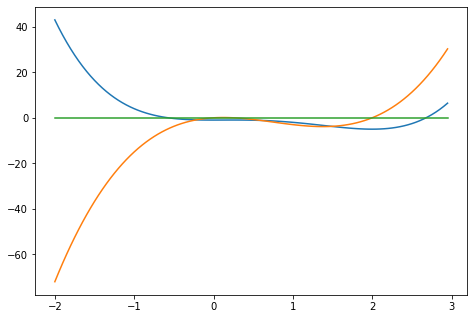

In [6]:
def dy_over_dx(x):
    return 4*x**3 - 9*x**2 + 2*x

%matplotlib inline
x = np.arange(-2.0, 3.0, 0.05).ravel()
y_vals_der = np.vectorize(dy_over_dx)(x)
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot(x,y_vals)
ax.plot(x,y_vals_der)
ax.plot(x,np.zeros(len(x)))

In [7]:
def corde(f, df, start, tol):
    m = df(start)
    x = start
    old_x = start * 10
    while abs(x-old_x) / abs(x) > tol:
        old_x = x
        x = x-f(x)/m
    return x

corde_result = corde(y, dy_over_dx, -2.2, TOL)
(corde_result, y(corde_result))

(-0.572891505126815, 4.285460875053104e-14)